1. **Linear Regression with Single Feature:**
   - Implement linear regression using a single feature dataset (e.g., predicting house prices based on square footage).
   - Visualize the data points and the regression line.
   - Evaluate the model using Mean Squared Error (MSE).

Simple Linear Regression Model:
Coefficients: [[1865.65066173]]
Intercept: [2642.0047844]
Mean Squared Error: 1322131.7940358662
R-squared: 0.7290760815415249


c:\Users\SSN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


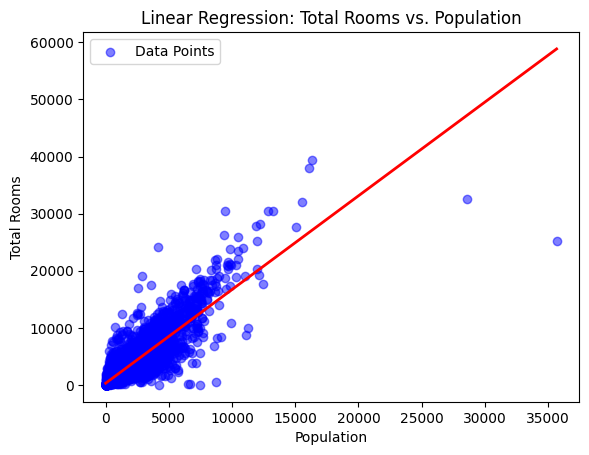

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('housing.csv') 

# data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

X = data[['population']]
y = data[['total_rooms']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

linear_coef = linear_model.coef_
linear_intercept = linear_model.intercept_

y_pred_linear = linear_model.predict(X_test_scaled)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Simple Linear Regression Model:")
print("Coefficients:", linear_coef)
print("Intercept:", linear_intercept)
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)


plt.scatter(X, y, color='blue', label='Data Points', alpha=0.5)


X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
y_pred_range = linear_model.predict(X_range_scaled)

plt.plot(X_range, y_pred_range, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Population')
plt.ylabel('Total Rooms')
plt.title('Linear Regression: Total Rooms vs. Population')
plt.legend()
plt.show()
